In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Depression WGCI 的分析与可视化

In [2]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context='paper', style='whitegrid', palette='muted')

In [3]:
data_root = Path(r'../depression/result/')
n_trial, n_dim, n_patient = 100, 3, 69 # [1, 69]

In [4]:
# 读取患者标签
with open(data_root / r'patient_label.pkl' , 'rb') as instream:
    type_label = pickle.load(instream)

## 1.1 每个患者的trial分析

In [5]:
# 读取结果
with open(data_root/ rf'WGCI_persons.pkl', 'rb') as instream:
    WGCI_persons = pickle.load(instream)

In [6]:
WGCI_persons[1].shape

(100, 3, 3)

### 1.1.1 可视化分析

In [7]:
# 构造用户绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * n_trial * 69  # 患者数
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_labels', 'patient_ID', 'trial_ID'])
plot_data['indexs'] = pd.Series(x_axis)
plot_data['patient_ID'] = pd.Series(np.array([[x] * n_trial * n_dim * n_dim for x in range(1, 70)]).reshape(-1,))
plot_data['trial_ID'] = pd.Series(np.array([[x] * n_dim * n_dim for x in range(1, 101)] * 69).reshape(-1,))
v1, v2 = [], []
for id in range(1, 70):
    v1.append(WGCI_persons[id].reshape(-1,))
    v2.append(([type_label[id]] * n_dim * n_dim * n_trial))
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_labels'] = pd.Series(np.array(v2).reshape(-1,))

In [8]:
plot_data.tail(10)

,indexs,WGCI_values,patient_labels,patient_ID,trial_ID
62090,"(2, 2)",0.000000,high,69,99
62091,"(0, 0)",0.000000,high,69,100
62092,"(0, 1)",0.101499,high,69,100
62093,"(0, 2)",0.000000,high,69,100
62094,"(1, 0)",0.048892,high,69,100
62095,"(1, 1)",0.000000,high,69,100
62096,"(1, 2)",0.000000,high,69,100
62097,"(2, 0)",0.000000,high,69,100
62098,"(2, 1)",0.000000,high,69,100
62099,"(2, 2)",0.000000,high,69,100


In [9]:
for i in plot_data.columns:
    print(i, plot_data[i].unique())

indexs ['(0, 0)' '(0, 1)' '(0, 2)' '(1, 0)' '(1, 1)' '(1, 2)' '(2, 0)' '(2, 1)'
 '(2, 2)']
WGCI_values [0.         0.023634   0.14736401 ... 0.13589101 0.025889   0.048892  ]
patient_labels ['high' 'mid' 'low']
patient_ID [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
trial_ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [10]:
# 保存数据
plot_data.to_csv(data_root/'plot_data_sta_persons.csv', encoding='utf-8')

1. **sns.boxenplot**

<Figure size 1296x576 with 0 Axes>

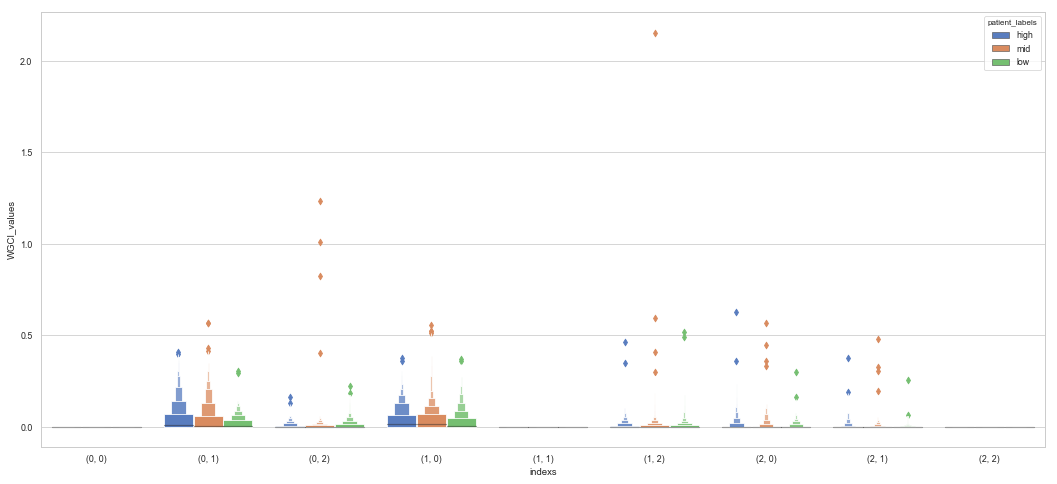

In [11]:
plt.figure(figsize=(18, 8))
ax = sns.boxenplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)

2. **sns.violinplot**

<Figure size 1296x576 with 0 Axes>

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


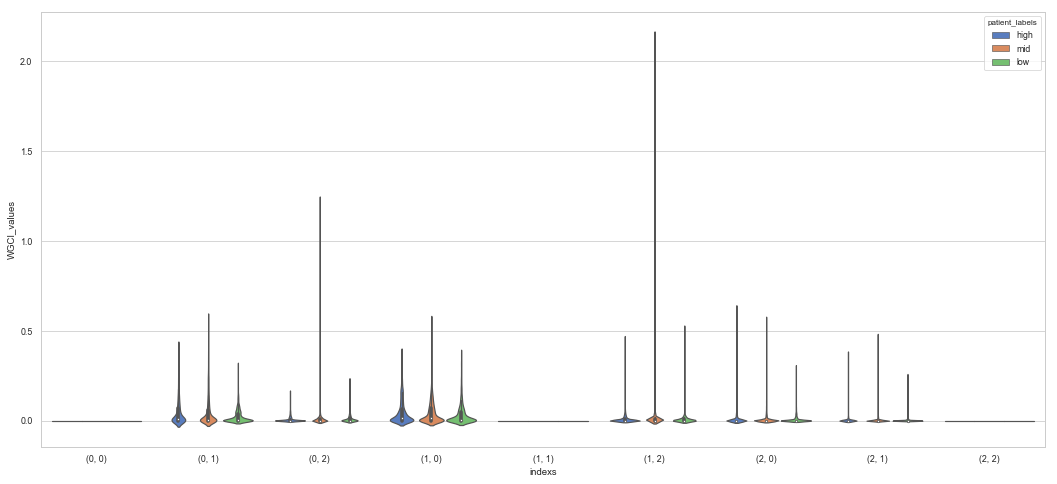

In [12]:
plt.figure(figsize=(18, 8))
ax = sns.violinplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)

3. **sns.boxplot**

<Figure size 1296x576 with 0 Axes>

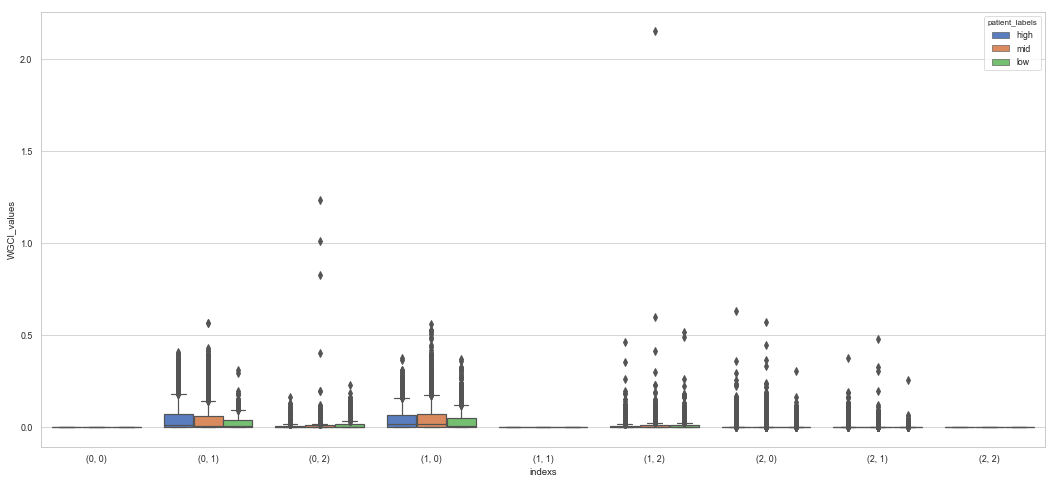

In [13]:
 plt.figure(figsize=(18, 8))
 ax = sns.boxplot(x='indexs', y='WGCI_values' , hue='patient_labels',data=plot_data)

4. **sns.swarmplot**

In [14]:
# 数据太多，费时
#  plt.figure(figsize=(18, 10))
#  ax = sns.swarmplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)

5. **sns.stripplot**

<Figure size 1296x720 with 0 Axes>

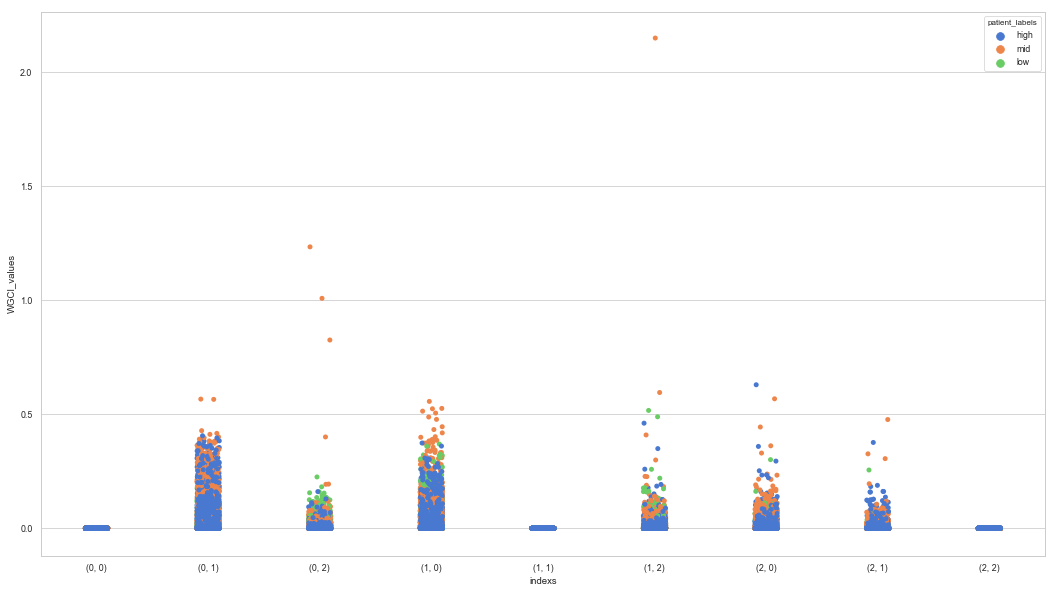

In [15]:
 plt.figure(figsize=(18, 10))
 ax = sns.stripplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)

## 1.2 各个患者的中值

In [16]:
# 读取结果
with open(data_root/ rf'WGCI_median_persons.pkl', 'rb') as instream:
    median_data = pickle.load(instream)  # 字典

In [17]:
median_data[1].shape

(3, 3)

In [18]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 69  # 患者数
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_labels', 'patient_ID'])
plot_data['indexs'] = pd.Series(x_axis)
plot_data['patient_ID'] = pd.Series(np.array([[x] * n_dim * n_dim for x in range(1, 70)]).reshape(-1,))
v1, v2 = [], []
for id in range(1, 70):
    v1.append(median_data[id].reshape(-1,))
    v2.append(([type_label[id]] * n_dim * n_dim))
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_labels'] = pd.Series(np.array(v2).reshape(-1,))

In [19]:
plot_data.tail(18)
plot_data.shape

,indexs,WGCI_values,patient_labels,patient_ID
603,"(0, 0)",0.000000,high,68
604,"(0, 1)",0.182831,high,68
605,"(0, 2)",0.000000,high,68
606,"(1, 0)",0.000000,high,68
607,"(1, 1)",0.000000,high,68
608,"(1, 2)",0.000000,high,68
609,"(2, 0)",0.000000,high,68
610,"(2, 1)",0.000000,high,68
611,"(2, 2)",0.000000,high,68
612,"(0, 0)",0.000000,high,69


(621, 4)

In [20]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_median_persons.csv', encoding='utf-8')

### 1.2.1 可视化分析
1. `sns.boxenplot`
2. `sns.violinplot`
3. `sns.boxplot`
4. `sns.swarmplot`
5. `sns.stripplot`

plot_type:  boxenplot


<Figure size 1296x576 with 0 Axes>

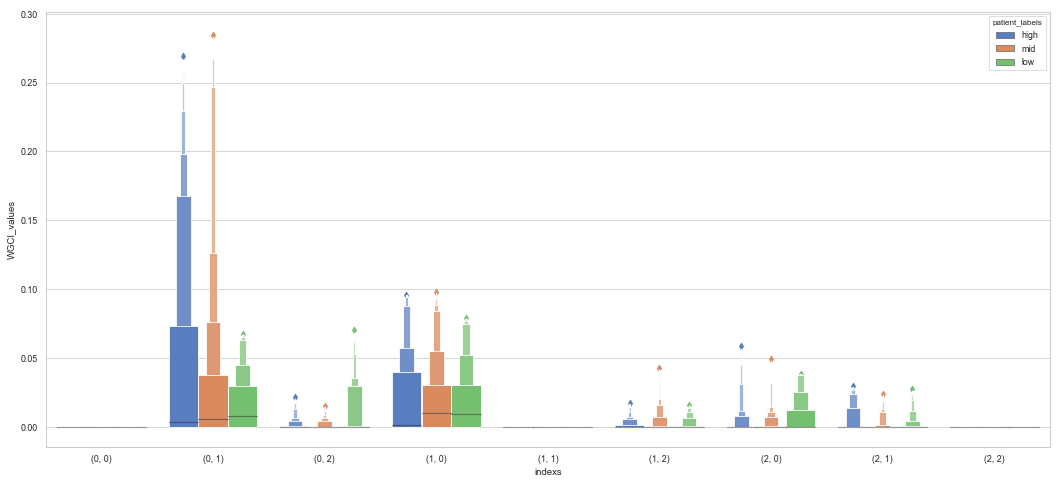

plot_type:  violinplot


<Figure size 1296x576 with 0 Axes>

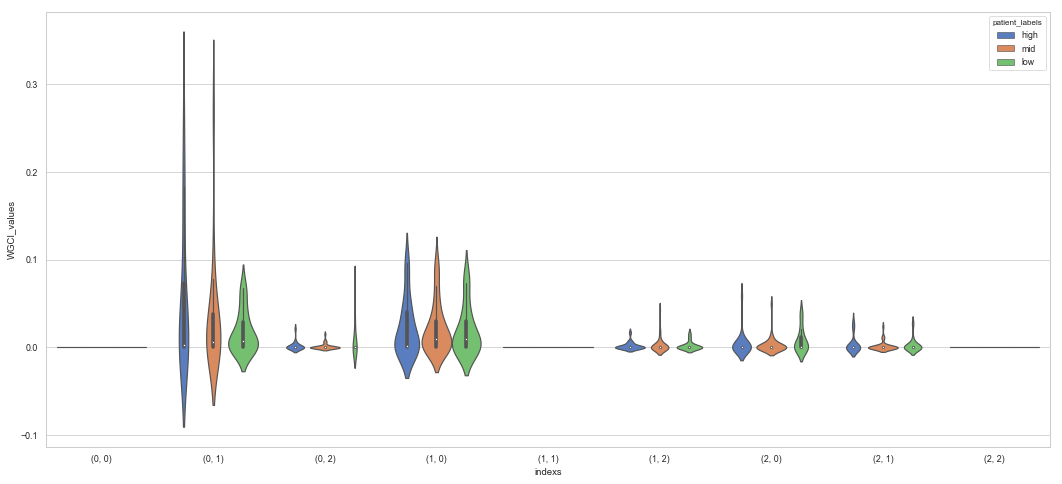

plot_type:  boxplot


<Figure size 1296x576 with 0 Axes>

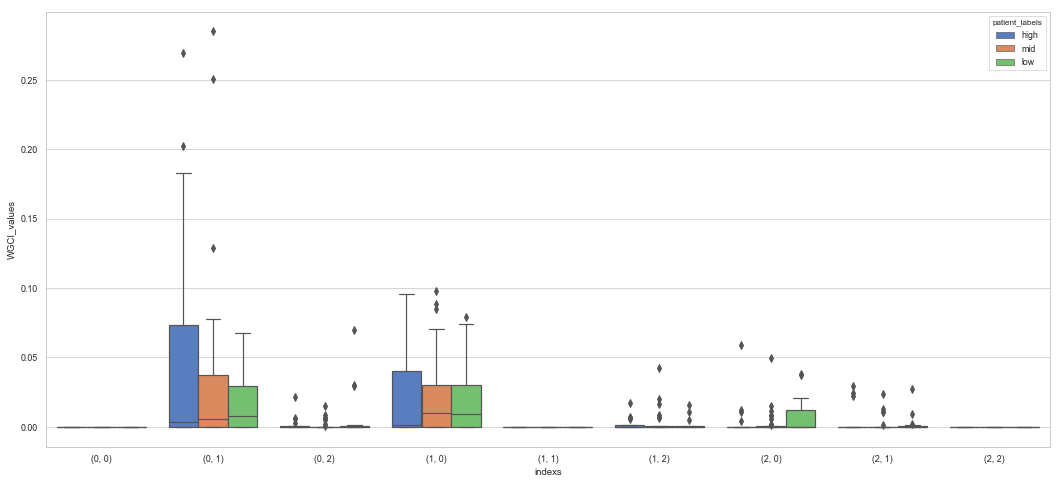

plot_type:  swarmplot


<Figure size 1296x576 with 0 Axes>

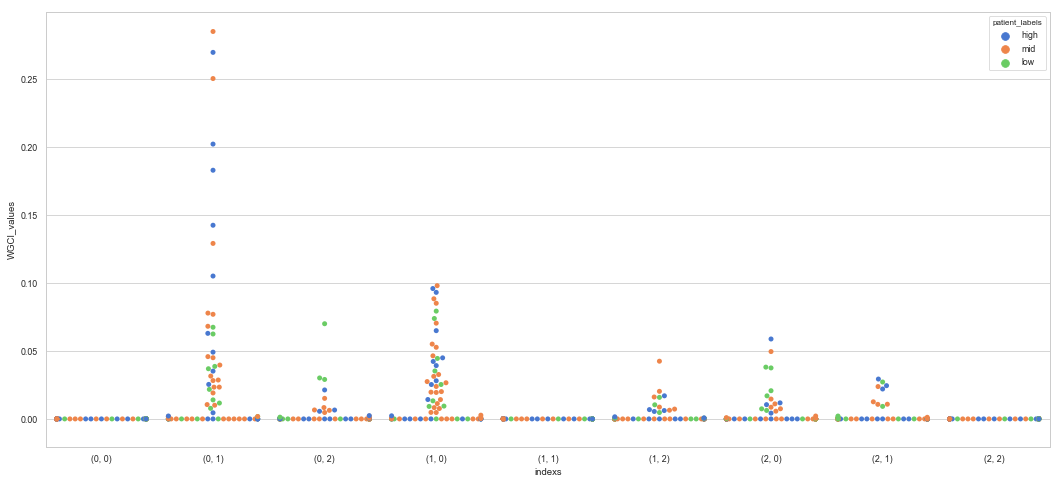

plot_type:  stripplot


<Figure size 1296x576 with 0 Axes>

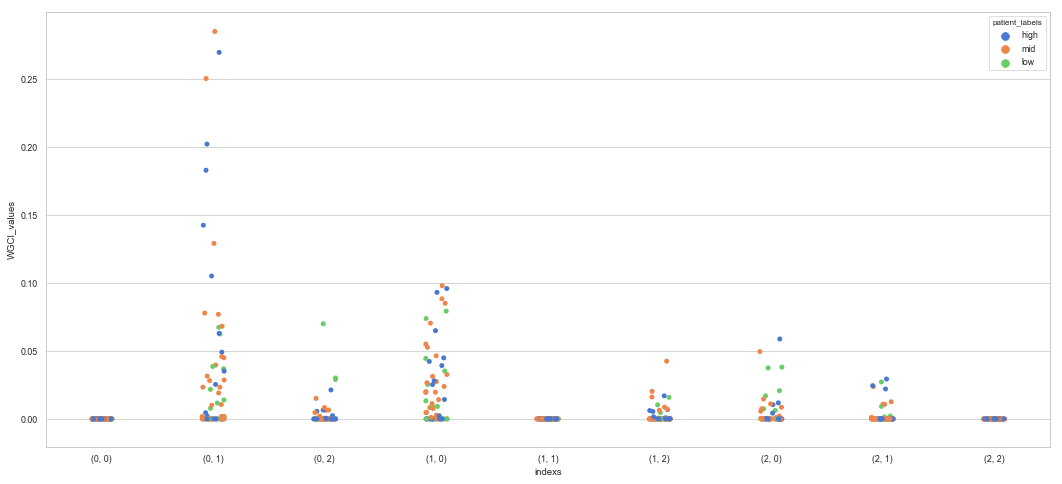

In [21]:
plot_type = ['boxenplot', 'violinplot', 'boxplot', 'swarmplot', 'stripplot']
for item in plot_type:
    print('plot_type: ', item)
    plt.figure(figsize=(18, 8))
    ax = getattr(sns, item)(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
    plt.show()

## 1.3 各个患者的均值

In [22]:
# 读取结果
with open(data_root / r'WGCI_mean_persons.pkl' , 'rb') as instream:
    mean_data = pickle.load(instream)

In [23]:
mean_data
mean_data[1].shape

{1: array([[0.        , 0.00037489, 0.00613909],
        [0.11761351, 0.        , 0.02708014],
        [0.006246  , 0.        , 0.        ]], dtype=float32),
 2: array([[0.        , 0.04726239, 0.00484906],
        [0.00102132, 0.        , 0.01302795],
        [0.        , 0.00131999, 0.        ]], dtype=float32),
 3: array([[0.        , 0.03675728, 0.00526129],
        [0.1285326 , 0.        , 0.00574125],
        [0.00215767, 0.00100076, 0.        ]], dtype=float32),
 4: array([[0.        , 0.0600627 , 0.0212745 ],
        [0.02293734, 0.        , 0.0129135 ],
        [0.00154015, 0.00140587, 0.        ]], dtype=float32),
 5: array([[0.        , 0.02145571, 0.0083871 ],
        [0.15495192, 0.        , 0.02135884],
        [0.0009417 , 0.00054269, 0.        ]], dtype=float32),
 6: array([[0.0000000e+00, 3.3152953e-02, 4.0956596e-03],
        [4.0771343e-02, 0.0000000e+00, 6.6201403e-03],
        [2.1683222e-02, 7.2240000e-05, 0.0000000e+00]], dtype=float32),
 7: array([[0.        , 0

(3, 3)

In [24]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 69  # 患者数
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_labels', 'patient_ID'])
plot_data['indexs'] = pd.Series(x_axis)
plot_data['patient_ID'] = pd.Series(np.array([[x] * n_dim * n_dim for x in range(1, 70)]).reshape(-1,))
v1, v2 = [], []
for id in range(1, 70):
    v1.append(mean_data[id].reshape(-1,))
    v2.append(([type_label[id]] * n_dim * n_dim))
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_labels'] = pd.Series(np.array(v2).reshape(-1,))

In [25]:
plot_data.tail(18)
plot_data.shape

,indexs,WGCI_values,patient_labels,patient_ID
603,"(0, 0)",0.000000,high,68
604,"(0, 1)",0.192037,high,68
605,"(0, 2)",0.003329,high,68
606,"(1, 0)",0.152585,high,68
607,"(1, 1)",0.000000,high,68
608,"(1, 2)",0.001499,high,68
609,"(2, 0)",0.008288,high,68
610,"(2, 1)",0.000554,high,68
611,"(2, 2)",0.000000,high,68
612,"(0, 0)",0.000000,high,69


(621, 4)

In [26]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_mean_persons.csv', encoding='utf-8')

### 1.3.1 可视化分析
1. `sns.boxenplot`
2. `sns.violinplot`
3. `sns.boxplot`
4. `sns.swarmplot`
5. `sns.stripplot`

plot_type:  boxenplot


<Figure size 1296x576 with 0 Axes>

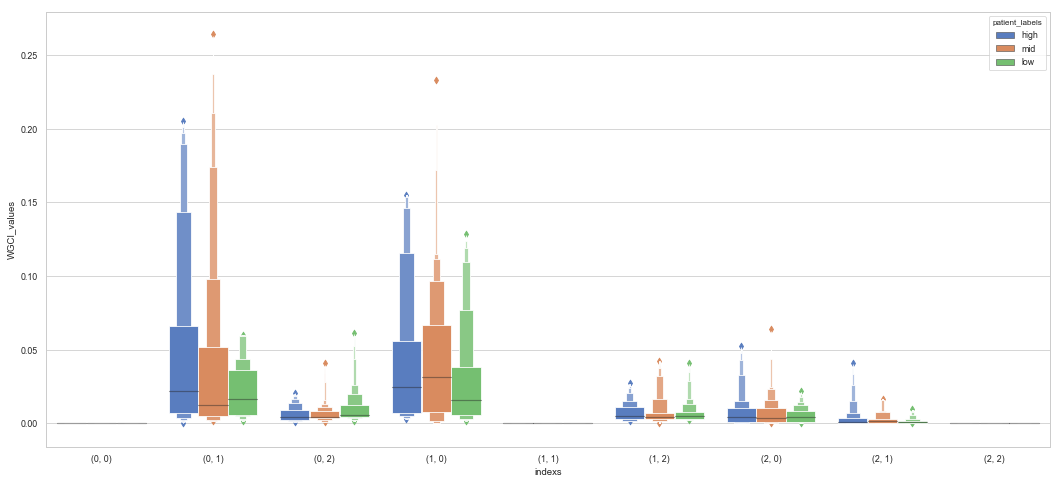

plot_type:  violinplot


<Figure size 1296x576 with 0 Axes>

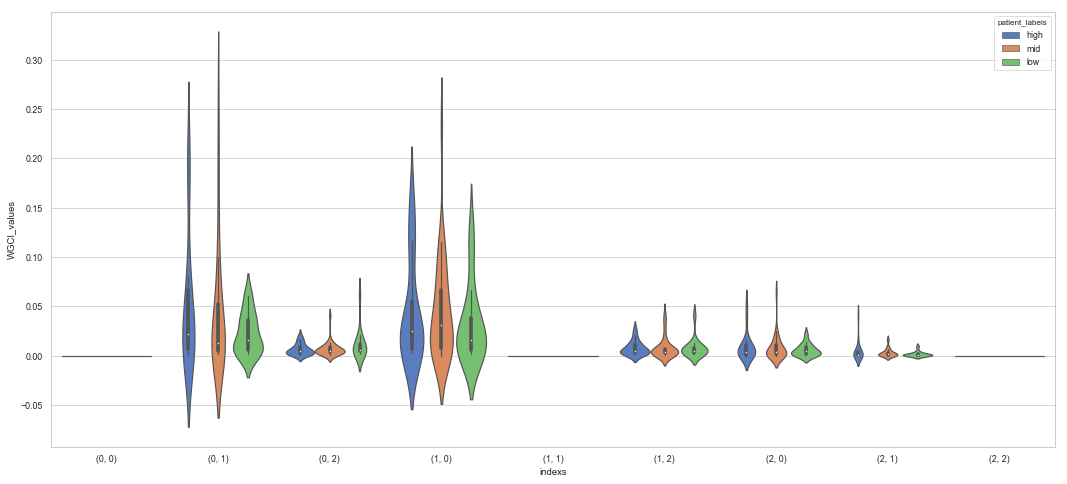

plot_type:  boxplot


<Figure size 1296x576 with 0 Axes>

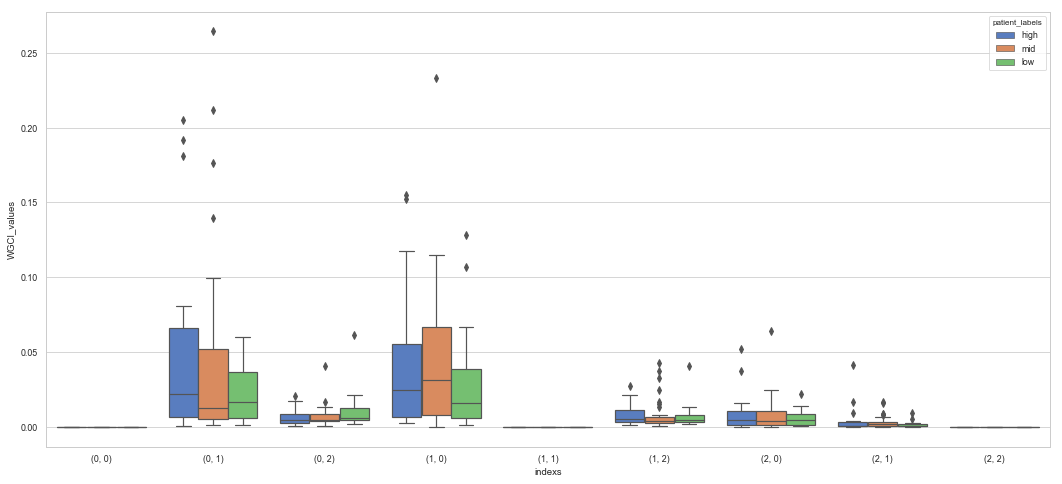

plot_type:  swarmplot


<Figure size 1296x576 with 0 Axes>

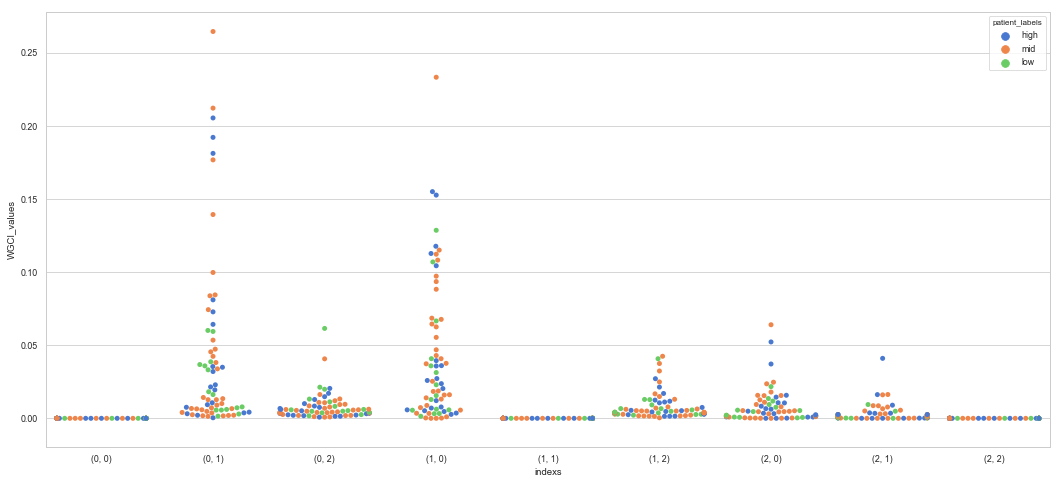

plot_type:  stripplot


<Figure size 1296x576 with 0 Axes>

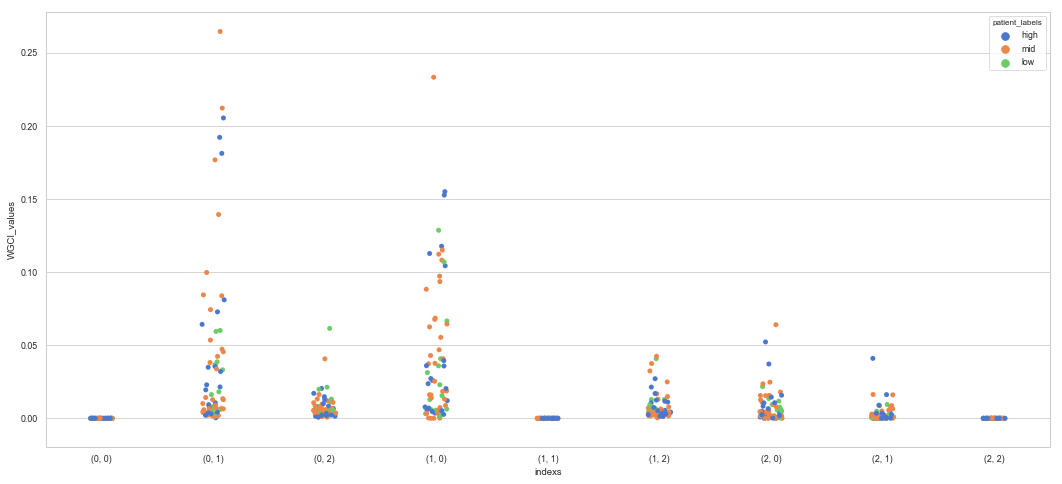

In [27]:
plot_type = ['boxenplot', 'violinplot', 'boxplot', 'swarmplot', 'stripplot']
for item in plot_type:
    print('plot_type: ', item)
    plt.figure(figsize=(18, 8))
    ax = getattr(sns, item)(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
    plt.show()

## 1.4 每种类型的患者分析

### 1.4.1 中值分析

In [28]:
# 读取结果
with open(data_root / r'WGCI_median_type_persons.pkl' , 'rb') as instream:
    median_type_data = pickle.load(instream)

In [29]:
median_type_data

{'low': array([[0.       , 0.0077695, 0.       ],
        [0.0091825, 0.       , 0.       ],
        [0.       , 0.       , 0.       ]]),
 'mid': array([[0.        , 0.00592   , 0.        ],
        [0.00977975, 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]),
 'high': array([[0.        , 0.00333025, 0.        ],
        [0.0011425 , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]])}

In [30]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 3  # 3 种类型的患者
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_type'])
plot_data['indexs'] = pd.Series(x_axis)
v1, v2 = [], []
for id in ['low', 'mid', 'high']:
    v1.append(median_type_data[id].reshape(-1,))
    v2.append([id] * n_dim * n_dim)
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_type'] = pd.Series(np.array(v2).reshape(-1,))

In [31]:
plot_data

,indexs,WGCI_values,patient_type
0,"(0, 0)",0.000000,low
1,"(0, 1)",0.007769,low
2,"(0, 2)",0.000000,low
3,"(1, 0)",0.009182,low
4,"(1, 1)",0.000000,low
5,"(1, 2)",0.000000,low
6,"(2, 0)",0.000000,low
7,"(2, 1)",0.000000,low
8,"(2, 2)",0.000000,low
9,"(0, 0)",0.000000,mid


In [32]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_median_type_persons.csv', encoding='utf-8')

### 可视化分析

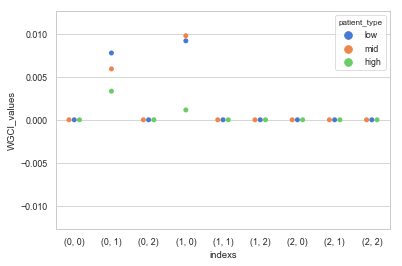

In [33]:
ax = sns.swarmplot(x='indexs', y='WGCI_values', hue='patient_type', data=plot_data)

### 1.4.2 均值分析

In [34]:
# 读取结果
with open(data_root / r'WGCI_mean_type_persons.pkl' , 'rb') as instream:
    mean_type_data = pickle.load(instream)

In [35]:
mean_type_data

{'low': array([[0.        , 0.02233856, 0.01160801],
        [0.03244721, 0.        , 0.00806406],
        [0.00583034, 0.00165131, 0.        ]]),
 'mid': array([[0.        , 0.04481915, 0.00677835],
        [0.04478242, 0.        , 0.00832849],
        [0.00777826, 0.0031108 , 0.        ]]),
 'high': array([[0.        , 0.05018048, 0.00656656],
        [0.04495633, 0.        , 0.00790278],
        [0.00902492, 0.00437515, 0.        ]])}

In [36]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 3  # 3 种类型的患者
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_type'])
plot_data['indexs'] = pd.Series(x_axis)
v1, v2 = [], []
for id in ['low', 'mid', 'high']:
    v1.append(mean_type_data[id].reshape(-1,))
    v2.append([id] * n_dim * n_dim)
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_type'] = pd.Series(np.array(v2).reshape(-1,))

In [37]:
plot_data

,indexs,WGCI_values,patient_type
0,"(0, 0)",0.000000,low
1,"(0, 1)",0.022339,low
2,"(0, 2)",0.011608,low
3,"(1, 0)",0.032447,low
4,"(1, 1)",0.000000,low
5,"(1, 2)",0.008064,low
6,"(2, 0)",0.005830,low
7,"(2, 1)",0.001651,low
8,"(2, 2)",0.000000,low
9,"(0, 0)",0.000000,mid


In [38]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_mean_type_persons.csv', encoding='utf-8')

### 可视化分析

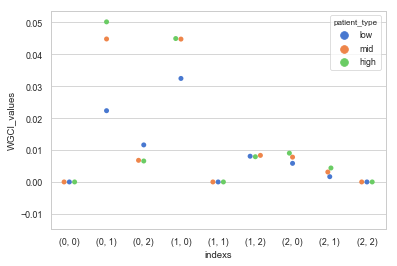

In [39]:
ax = sns.swarmplot(x='indexs', y='WGCI_values', hue='patient_type', data=plot_data)

## 1.4 网络可视化
1. [Weighted Graph](https://networkx.github.io/documentation/latest/auto_examples/drawing/plot_weighted_graph.html#sphx-glr-auto-examples-drawing-plot-weighted-graph-py)

In [40]:
import networkx as nx

### 1.4.1 中值网络

In [41]:
# 读取结果
with open(data_root / r'WGCI_median_type_persons.pkl' , 'rb') as instream:
    median_type_data = pickle.load(instream)

In [42]:
median_type_data

{'low': array([[0.       , 0.0077695, 0.       ],
        [0.0091825, 0.       , 0.       ],
        [0.       , 0.       , 0.       ]]),
 'mid': array([[0.        , 0.00592   , 0.        ],
        [0.00977975, 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]),
 'high': array([[0.        , 0.00333025, 0.        ],
        [0.0011425 , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]])}

In [43]:
def make_graph(data):
    G = nx.Graph()
    for x in ['ch1', 'ch2', 'ch3']:
        G.add_node(x, node_size=5000)
    n_ch = data.shape[0]
    for row in range(n_ch):
        for col in range(n_ch):
            if data[row, col] > 1e-5:
                G.add_edge(f'ch{row + 1}', f'ch{col + 1}', weight=data[row, col])
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.005]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.005]

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge,
                           width=6)
    nx.draw_networkx_edges(G, pos, edgelist=esmall,
                           width=6, alpha=0.5, edge_color='b', style='dashed')

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.axis('off')
    plt.show()

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The

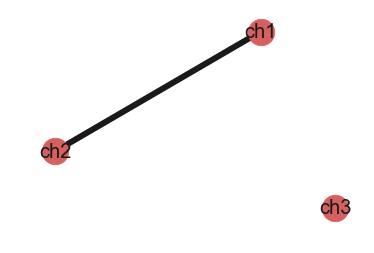

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The

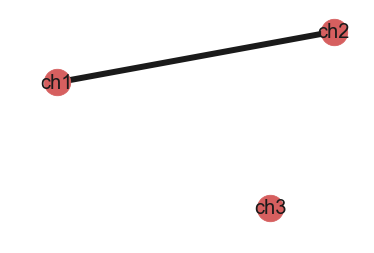

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The

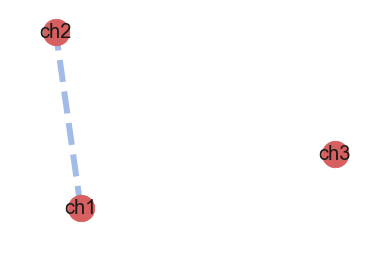

In [44]:
for item in median_type_data.keys():
    make_graph(median_type_data[item])

### 1.4.2 均值网络

In [45]:
# 读取结果
with open(data_root / r'WGCI_mean_type_persons.pkl' , 'rb') as instream:
    mean_type_data = pickle.load(instream)